# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Hormona GLP-1**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

#### **Miembros del equipo:**
- Cesar Ivan Herrera Martinez A01796392  
- Juan Antonio Cruz Acosta A01795375 
- Julio Baltazar Colín A01794476 

# Introducción  

La **diabetes mellitus tipo II** es una de las enfermedades crónicas más prevalentes a nivel mundial y representa un grave problema de salud pública. Según la **Organización Mundial de la Salud (OMS)**, en 2021 se estimaron más de *460 millones* de personas viviendo con diabetes, y se proyecta que esta cifra aumente de manera considerable en las próximas décadas [1]. En **América Latina** y particularmente en **México**, la diabetes se ha consolidado como una de las principales causas de mortalidad y discapacidad, con un fuerte impacto tanto en la calidad de vida de los pacientes como en los sistemas de salud [2].  

Uno de los mecanismos terapéuticos más prometedores para el control glucémico es la activación de la hormona **GLP-1 (*Glucagon-like peptide-1*)**, la cual regula de forma clave la secreción de insulina y el metabolismo de la glucosa. Fármacos exitosos como la **semaglutida (Ozempic)** y la **dulaglutida (Trulicity)** se basan en agonistas de GLP-1, logrando resultados altamente eficaces en el tratamiento de la diabetes tipo II y la obesidad. Sin embargo, el diseño y optimización de estos compuestos ha requerido procesos experimentales de laboratorio extensos, prolongados y costosos, que suelen superar los *15 años* de investigación y desarrollo [3].  

El objetivo de este proyecto es **desarrollar un modelo de inteligencia artificial** capaz de identificar y generar compuestos moleculares con alta eficiencia agonista de la hormona GLP-1, lo que podría acelerar el descubrimiento de nuevos fármacos para el tratamiento de la diabetes tipo II y la obesidad. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.  

En esta etapa, se analizarán datos obtenidos de bases de datos especializadas como **DrugBank** y **Protein Data Bank (PDB)** [4,5], que contienen información sobre agonistas de GLP-1 y secuencias de proteínas en formato **FASTA**. 


# Análisis Exploratorio de Datos (EDA)

## Descripción y origen del conjunto de datos
Para este proyecto se usarán las bases de datos del National Center for Biotechnology (NCBI) con datos referentes a grupos de proteínas análogas al GLP-1R de diferentes especies y algunos agonistas de GLP-1 de uso médico para el tratamiento de la diabetes tipo II.

Como fuente principal para el modelo se empleará el conjunto de datos del estudio de Puszkarska, A.M., et al. (2024). Este consiste en 125 péptidos con su respectiva actividad (EC50) medida para los receptores GCGR y GLP-1R de forma experimental
Adicionalmente se incluyen algunos compuestos catlogados en la base de datos UniProt como de estructura similar a la GLP-1

Origenes de los datos:
- 125 péptidos con su respectiva actividad (EC50)  Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/training_data.xlsx

- 288 Peptidos en formato FASTA referidos por Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/FASTA_files/NCBI_data/GLP1.fasta

- Archivo FASTA con proteinas identicas a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_100%3AUniRef100_P01275

 - Archivo FASTA con proteinas con coincidencia del 50% a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_50%3AUniRef50_P01275

 - Archivo FASTA de medicamentos aprobados y bajo investigacion agonistas de GLP-1 con actividad sobre GLP-1r (drugbank)
 https://go.drugbank.com/categories/DBCAT002693

 - Archivo excel de secuencias similares porporcionadas por alpaFold con 1945 registros
 https://alphafold.com/search/sequence/HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR?page=1

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3Esp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20OS%3DHomo%20sapiens%20OX%3D9606%20GN%3DGCG%20PE%3D1%20SV%3D3%0AMKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS%0ADYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI%0AAWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK&JOB_TITLE=sp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20full%20seq%20%28refseq%20protein%29&NEWWIN=on&NEWWIN=on&GAPCOSTS=11%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=0.05&WORD_SIZE=5&MATRIX_NAME=BLOSUM62&COMPOSITION_BASED_STATISTICS=2&PROG_DEFAULTS=on&SHOW_OVERVIEW=true&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&EQ_MENU=Enter%20organism%20name%20or%20id--completions%20will%20be%20suggested&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on


- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=nr&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

## Exploracion de los archivos de secuencias de aminoacidos

Para este trabajo se emplearan archivos e formato fasta y csv con las secuencias de peptidos similares al glucagon humano para entrena los modelos de ML que permitan acelerar la busqueda de compuestos Agonistas de la Hormona GLP-1.
El conjunto de datos consiste en 7 archivos en Formato FASTA y un archivo CSV obtenido de la busqueda de secuencias similares al pro-glugacon humano (GLP-1) en la base de datos de AlphaFold.

### Descripción del formato FASTA
Un archivo FASTA es un formato de archivo de texto utilizado en bioinformática para almacenar secuencias de nucleótidos (ADN o ARN) o de aminoácidos (proteínas). 

Las características principales de un archivo FASTA son:

Línea de Encabezado/Descripción: Cada secuencia en un archivo FASTA comienza con una única línea de encabezado que se distingue por el símbolo de "mayor que" (>) al principio. Esta línea proporciona un identificador único para la secuencia y puede incluir información descriptiva adicional.

Datos de la Secuencia: Inmediatamente después de la línea de encabezado, siguen las líneas que contienen la secuencia en sí. Esta secuencia se representa mediante códigos de una sola letra (por ejemplo, A, C, G, T para el ADN). La secuencia puede estar en una sola línea larga o dividida en varias líneas para facilitar la lectura.

Un solo archivo FASTA puede contener múltiples secuencias, cada una con su propia línea de encabezado y datos de secuencia.

 - >secuencia_ejemplo_1 Homo sapiens gen de la hemoglobina
AGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCT
AGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCT
AGCTAGCTAGCTAGCTAGCT

In [1]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Optional
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import os

In [2]:
# Ruta los archivos de datos
directorio_base = Path("../data/raw")

### Exploracion de los archivos FASTA nativo

In [3]:
lista_de_archivos_fasta = [
     directorio_base/"human_pro_glucagon.fasta"
    ,directorio_base/"uniprotkb_100_identity_HGLP-1.fasta"
    ,directorio_base/"uniprotkb_90_identity_HGLP-1.fasta"
    ,directorio_base/"uniprotkb_50_identity_HGLP-1.fasta"
    ,directorio_base/"BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta"
    ,directorio_base/"GLP-1_agonists_drugs.fasta"
    ,directorio_base/"GLP1_Puszkarska.fasta"
]

In [4]:
aphaFold = directorio_base / 'aphaFoldSimilarToGLP1.csv'

In [5]:
def mostrar_primeras_lineas(archivos, num_lineas=5):
    """
    Lee y muestra un número específico de las primeras líneas de cada archivo en una lista.
    
    Args:
        archivos (list): Una lista de rutas a los archivos.
        num_lineas (int): El número de líneas a mostrar por cada archivo.
    """
    if not archivos:
        print("La lista de archivos está vacía. Por favor, añade archivos a la lista.")
        return

    # Itera sobre cada nombre de archivo en la lista proporcionada
    for nombre_archivo in archivos:
        print(f"--- Revisando: {nombre_archivo} ---")
        
        try:
            # 'with open' se encarga de abrir y cerrar el archivo de forma segura
            with open(nombre_archivo, 'r') as f:
                # Lee y muestra el número de líneas especificado
                for i in range(num_lineas):
                    linea = f.readline()
                    # Si la línea está vacía, significa que llegamos al final del archivo
                    if not linea:
                        print("(Fin del archivo)")
                        break
                    # Imprime la línea, .strip() quita espacios en blanco y saltos de línea extra
                    print(linea.strip())

        except FileNotFoundError:
            # Maneja el caso en que un archivo de la lista no se encuentre
            print(f"ERROR: El archivo '{nombre_archivo}' no se encontró.")
        except Exception as e:
            # Captura cualquier otro error que pueda ocurrir
            print(f"Ocurrió un error inesperado al leer '{nombre_archivo}': {e}")
        
        # Añade un espacio para separar la salida de cada archivo
        print("-" * 35 + "\n")

In [6]:
print(F"--- Mostrando las primeras líneas de cada archivo FASTA ---\n")
mostrar_primeras_lineas(lista_de_archivos_fasta)

--- Mostrando las primeras líneas de cada archivo FASTA ---

--- Revisando: ..\data\raw\human_pro_glucagon.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606 GN=GCG PE=1 SV=3
MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS
DYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI
AWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK
(Fin del archivo)
-----------------------------------

--- Revisando: ..\data\raw\uniprotkb_100_identity_HGLP-1.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606 GN=GCG PE=1 SV=3
MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS
DYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI
AWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK
>tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan paniscus OX=9597 GN=GCG PE=3 SV=1
-----------------------------------

--- Revisando: ..\data\raw\uniprotkb_90_identity_HGLP-1.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606

In [8]:
import pandas as pd

# Reemplaza 'tu_archivo.csv' con la ruta a tu archivo CSV.
nombre_archivo = aphaFold

try:
    # Cargar el archivo CSV en un DataFrame de pandas
    df_alphafold = pd.read_csv(nombre_archivo)

    print("--- 1. Primeras 5 filas del archivo ---")
    # Muestra las primeras 5 filas para tener una idea de la estructura y los datos
    print(df_alphafold.head())
    print("\n" + "="*50 + "\n")

    print("--- 2. Información general del archivo ---")
    # Muestra un resumen conciso del DataFrame, incluyendo el tipo de cada columna
    # y el número de valores no nulos. ¡Muy útil para detectar datos faltantes!
    print(df_alphafold.info())
    print("\n" + "="*50 + "\n")

    print("--- 3. Resumen estadístico (solo para columnas numéricas) ---")
    # Calcula estadísticas descriptivas como la media, desviación estándar,
    # valores mínimos y máximos, y los percentiles.
    print(df_alphafold.describe())
    print("\n" + "="*50 + "\n")
    
    print("--- 4. Dimensiones del archivo (filas, columnas) ---")
    # Muestra cuántas filas y columnas tiene tu archivo
    print(f"El archivo tiene {df_alphafold.shape[0]} filas y {df_alphafold.shape[1]} columnas.")


except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo}'. Asegúrate de que la ruta sea correcta.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- 1. Primeras 5 filas del archivo ---
     AFDB accession  Description                   Species  \
0      AF-Q6PPF4-F1     Glucagon              Capra hircus   
1      AF-U3KRF3-F1  Liraglutide  Saccharomyces cerevisiae   
2  AF-A0A1L7NR18-F1     Glucagon               Felis catus   
3  AF-A0A2F0BJC2-F1     Glucagon     Eschrichtius robustus   
4  AF-A0A091DI12-F1     Glucagon        Fukomys damarensis   

   Average pLDDT (target)  Sequence length (target)  \
0                   72.88                        45   
1                   76.06                        31   
2                   64.88                       123   
3                   67.12                       148   
4                   66.31                       159   

                                     Target sequence Positives Matches  \
0      NNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRR      30/30 (100%)   
1                    HAEGTFTSDVSSYLEGQAAKEFIAWLVRGRG      30/30 (100%)   
2  HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKR

In [12]:
df_alphafold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AFDB accession            1944 non-null   object 
 1   Description               1944 non-null   object 
 2   Species                   1944 non-null   object 
 3   Average pLDDT (target)    1944 non-null   float64
 4   Sequence length (target)  1944 non-null   int64  
 5   Target sequence           1944 non-null   object 
 6   Positives Matches         1944 non-null   object 
 7   Sequence Identity         1944 non-null   int64  
 8   E-value                   1944 non-null   float64
 9   HSP score                 1944 non-null   int64  
 10  Query                     1944 non-null   object 
 11  Gaps                      1944 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 182.4+ KB


In [13]:
df_alphafold.head()

,AFDB accession,Description,Species,Average pLDDT (target),Sequence length (target),Target sequence,Positives Matches,Sequence Identity,E-value,HSP score,Query,Gaps
0,AF-Q6PPF4-F1,Glucagon,Capra hircus,72.88,45,NNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRR,30/30 (100%),30,5.387230e-13,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
1,AF-U3KRF3-F1,Liraglutide,Saccharomyces cerevisiae,76.06,31,HAEGTFTSDVSSYLEGQAAKEFIAWLVRGRG,30/30 (100%),29,1.208460e-12,152,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
2,AF-A0A1L7NR18-F1,Glucagon,Felis catus,64.88,123,HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKRNKNNIAKRHDEFERH...,30/30 (100%),30,3.516260e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
3,AF-A0A2F0BJC2-F1,Glucagon,Eschrichtius robustus,67.12,148,SFPAPQTDPLNDPDQMNEDKRHSQGTFTSDYSKYLDSRRAQDFVQW...,30/30 (100%),30,6.032010e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
4,AF-A0A091DI12-F1,Glucagon,Fukomys damarensis,66.31,159,MYIAPIAIFHRSFSASQTELPDDPDQMNEDKRHSQGTFTSDYSKYL...,30/30 (100%),30,7.500020e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)


### Carga y conversion del archivo de alpha fold al formato fasta para el analisis

El archivo resultado de la busqueda de secuencias similares de Aphafold es un archivo en formato CSV con datos referentes a la busqueda, se realiza la conversion al formato FASTA para trabajar con los registos

In [16]:
# Convertir CSV a FASTA
archivo_csv = aphaFold
archivo_fasta = directorio_base / 'aphaFoldSimilarToGLP1.fasta'

print(f"Iniciando la conversión de '{archivo_csv}' a '{archivo_fasta}'...")

try:
    # Cargar el archivo CSV en un DataFrame de pandas
    df_aphaFoldSimilarToGLP1 = pd.read_csv(archivo_csv)

    # Abrir el archivo de salida en modo de escritura
    with open(archivo_fasta, 'w') as fasta_file:
        # Iterar sobre cada fila del DataFrame
        for index, row in df_aphaFoldSimilarToGLP1.iterrows():
            # Extraer la información necesaria de las columnas
            accession = row['AFDB accession']
            description = row['Description']
            species = row['Species']
            sequence = row['Target sequence']

            # 1. Construir el encabezado FASTA
            # Formato: >ID_de_acceso Descripción [Especie]
            header = f">{accession} {description} [{species}]"

            # 2. Escribir el encabezado y la secuencia en el archivo de salida
            fasta_file.write(header + '\n')
            fasta_file.write(sequence + '\n')
    
    print(f"¡Conversión completada! Se procesaron {len(df_aphaFoldSimilarToGLP1)} registros.")
    print(f"Nuevo archivo: {archivo_fasta}")

except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo '{archivo_csv}'.")
    print("Asegúrate de que el script y el archivo CSV estén en la misma carpeta.")
except KeyError as e:
    print(f"Error: Una columna esperada no fue encontrada: {e}.")
    print("Por favor, revisa que tu archivo CSV tenga las columnas correctas.")

Iniciando la conversión de '..\data\raw\aphaFoldSimilarToGLP1.csv' a '..\data\raw\aphaFoldSimilarToGLP1.fasta'...
¡Conversión completada! Se procesaron 1944 registros.
Nuevo archivo: ..\data\raw\aphaFoldSimilarToGLP1.fasta


## Validación de los archivos en formato FASTA

Se valida que los archivos tengan un formato valido pues sus contenidos sera usado en herramientas externas de linea de comandos

In [18]:
def validate_fasta_file(file_path: str) -> Optional[int]:
    """
    Valida un archivo FASTA y, si es válido, cuenta el número de registros.

    Args:
        file_path: La ruta al archivo que se quiere validar.

    Returns:
        El número de registros (int) si el archivo es válido.
        None si el archivo es inválido o no se encuentra.
    """
    print(f"Procesando archivo: {file_path}...")
    contador = 0
    try:
        with open(file_path, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                # Verificación de que la secuencia no esté vacía
                if len(record.seq) == 0:
                    print(f" Error: El registro '{record.id}' no tiene secuencia.")
                    return None
                
                # Si el registro es válido, incrementamos el contador
                contador += 1
        
        # Si el bucle termina, el archivo es válido
        print(f" ¡Formato correcto! Se encontraron {contador} registros.")
        return contador

    except FileNotFoundError:
        print(f"Error: El archivo no se encontró en la ruta especificada.")
        return None
    except Exception as e:
        print(f"Error de formato FASTA inválido: {e}")
        return None



In [19]:
# Lista de nombres de archivos FASTA
archivos_fasta = [
     "human_pro_glucagon.fasta"
    ,"uniprotkb_100_identity_HGLP-1.fasta"
    ,"uniprotkb_90_identity_HGLP-1.fasta"
    ,"uniprotkb_50_identity_HGLP-1.fasta"
    ,"BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta"
    ,"GLP-1_agonists_drugs.fasta"
    ,"GLP1_Puszkarska.fasta"
    ,"aphaFoldSimilarToGLP1.fasta"
]

rutas_completas = [directorio_base / nombre for nombre in archivos_fasta]
rutas_completas

[WindowsPath('../data/raw/human_pro_glucagon.fasta'),
 WindowsPath('../data/raw/uniprotkb_100_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_90_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_50_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta'),
 WindowsPath('../data/raw/GLP-1_agonists_drugs.fasta'),
 WindowsPath('../data/raw/GLP1_Puszkarska.fasta'),
 WindowsPath('../data/raw/aphaFoldSimilarToGLP1.fasta')]

### Analisis del número de registros de los archivos FASTA

In [20]:
# validar y contar los registros fasta por archivo

resultados_archivos = {}

print("\n--- Iniciando validación y conteo de archivos ---")
# Usamos la lista de rutas que acabamos de crear
for archivo_path in rutas_completas:
    num_registros = validate_fasta_file(archivo_path)
    
    # Usamos archivo_path.name para obtener solo el nombre del archivo para el reporte
    if num_registros is not None:
        resultados_archivos[archivo_path.name] = num_registros
    
    print("-" * 20)

print("\n--- Proceso terminado ---")
print("Resumen de archivos válidos y su contenido:")

if resultados_archivos:
    for archivo, cuenta in resultados_archivos.items():
        print(f"  - {archivo}: {cuenta} registros")
else:
    print("No se encontraron archivos FASTA válidos.")


--- Iniciando validación y conteo de archivos ---
Procesando archivo: ..\data\raw\human_pro_glucagon.fasta...
 ¡Formato correcto! Se encontraron 1 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_100_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 5 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_90_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 18 registros.
--------------------
Procesando archivo: ..\data\raw\uniprotkb_50_identity_HGLP-1.fasta...
 ¡Formato correcto! Se encontraron 25 registros.
--------------------
Procesando archivo: ..\data\raw\BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta...
 ¡Formato correcto! Se encontraron 100 registros.
--------------------
Procesando archivo: ..\data\raw\GLP-1_agonists_drugs.fasta...
 ¡Formato correcto! Se encontraron 6 registros.
--------------------
Procesando archivo: ..\data\raw\GLP1_Puszkarska.fasta...
 ¡Formato correcto! Se encontraron 288 registros.
--

## Eliminacion de secuencias duplicadas

Los archivos contienen secuencias duplicadas con los otros archivos empleados, se realizara la depuración de los registros.

In [21]:
def remove_duplicate_seqs(path_to_fasta_files: list) -> list:
    """
    Lee múltiples archivos FASTA, elimina secuencias duplicadas y devuelve una
    lista de registros únicos. No se hacen busquedas por segmentos de secuencias.

    Args:
        lista_rutas_fasta: Una lista de objetos Path a los archivos FASTA.

    Returns:
        Una lista de objetos SeqRecord únicos.
    """
    sequencies_seen = {}
    total_read = 0
    
    print("Iniciando lectura y depuración de secuencias...")
    
    for ruta_archivo in path_to_fasta_files:
        try:
            with open(ruta_archivo, "r") as handle:
                # Parseamos cada archivo FASTA
                for record in SeqIO.parse(handle, "fasta"):
                    total_read += 1
                    sequency_str = str(record.seq).upper()
                    
                    # Si la secuencia no ha sido vista antes, la guardamos.
                    # La clave es la secuencia, el valor es el registro completo.
                    if sequency_str not in sequencies_seen:
                        sequencies_seen[sequency_str] = record
                        sequencies_seen[sequency_str].file = ruta_archivo.name  # Guardamos el nombre del archivo de origen
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo '{ruta_archivo}'. Será omitido.")

    # La lista de registros únicos son los valores de nuestro diccionario
    unique_records = list(sequencies_seen.values())
    
    # --- Reporte Final ---
    print("\n--- RESUMEN DE LA DEPURACIÓN ---")
    print(f"Archivos procesados: {len(path_to_fasta_files)}")
    print(f"Total de registros leídos: {total_read}")
    duplicados = total_read - len(unique_records)
    print(f"Registros duplicados eliminados: {duplicados}")
    print(f"Total de secuencias únicas: {len(unique_records)}")
    
    return unique_records

In [22]:
secuencias_unicas = remove_duplicate_seqs(rutas_completas)

lista_para_df = [
    {
        'ID': record.id,
        'Descripcion': record.description,
        'Secuencia': str(record.seq),
        'Archivo_origen': record.file
    }
    for record in secuencias_unicas
]

# Creamos el DataFrame
df_peptidos_unicos = pd.DataFrame(lista_para_df)

print("\nSe ha creado un DataFrame con las secuencias únicas.")
print("Primeras 5 filas del DataFrame:")
print(df_peptidos_unicos.head())

Iniciando lectura y depuración de secuencias...

--- RESUMEN DE LA DEPURACIÓN ---
Archivos procesados: 8
Total de registros leídos: 2387
Registros duplicados eliminados: 1465
Total de secuencias únicas: 922

Se ha creado un DataFrame con las secuencias únicas.
Primeras 5 filas del DataFrame:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRS

In [23]:
df_peptidos_unicos.describe()

,ID,Descripcion,Secuencia,Archivo_origen
count,922,922,922,922
unique,922,922,922,8
top,sp|P01275|GLUC_HUMAN,sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,aphaFoldSimilarToGLP1.fasta
freq,1,1,1,768


In [24]:
df_peptidos_unicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              922 non-null    object
 1   Descripcion     922 non-null    object
 2   Secuencia       922 non-null    object
 3   Archivo_origen  922 non-null    object
dtypes: object(4)
memory usage: 28.9+ KB


In [25]:
df_peptidos_unicos.head()

,ID,Descripcion,Secuencia,Archivo_origen
0,sp|P01275|GLUC_HUMAN,sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,human_pro_glucagon.fasta
1,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,uniprotkb_100_identity_HGLP-1.fasta
2,tr|A0A096MTV1|A0A096MTV1_PAPAN,tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...,MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...,uniprotkb_90_identity_HGLP-1.fasta
3,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...,uniprotkb_90_identity_HGLP-1.fasta
4,tr|A0A2K5SE38|A0A2K5SE38_CEBIM,tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQTDPLSDPDQ...,uniprotkb_90_identity_HGLP-1.fasta


## Análisis de Longitud de Secuencias

Se realiza el análisis para determinar la variablilidad de la longitud de las secuencias ¿Son todos de un tamaño similar o hay una gran variabilidad?
Las secuencias con un número anomalo de aminoacidos, pueden no ser correctas o tener caracterisiticas fisico quimicas diferentes a la secuencia buscada

Estadísticas de la Longitud de las Secuencias:
count     922.000000
mean      173.290672
std       122.502162
min        26.000000
25%       122.000000
50%       179.000000
75%       201.000000
max      1183.000000
Name: Longitud, dtype: float64


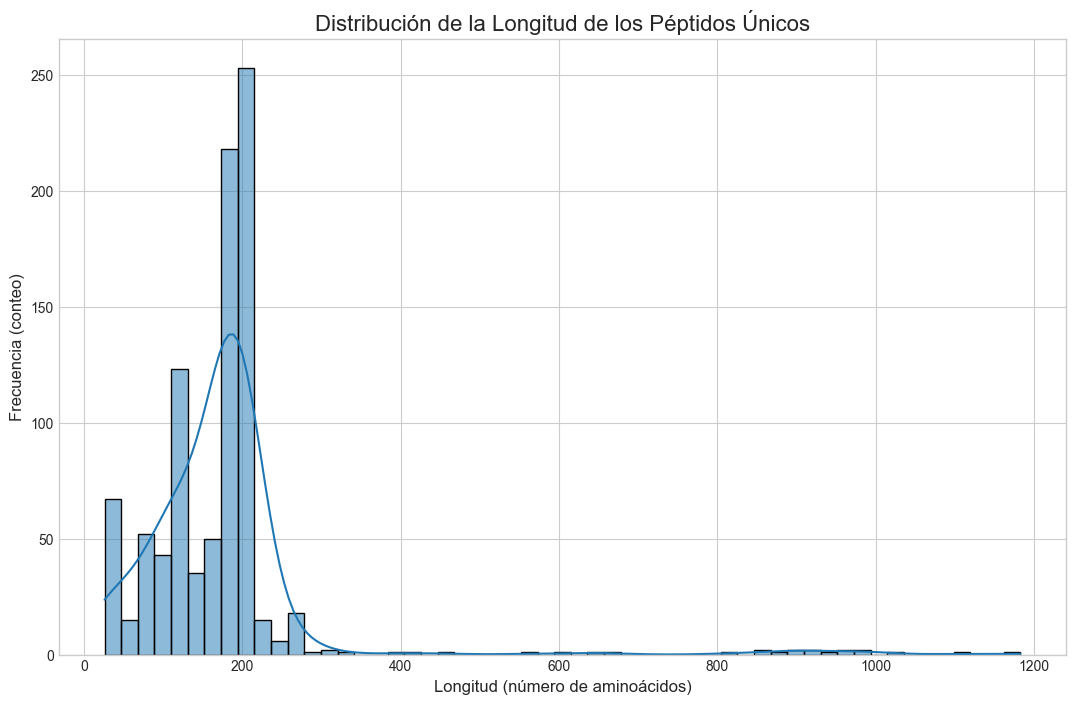

In [26]:
# Calcular la longitud de cada secuencia
df_peptidos_unicos['Longitud'] = df_peptidos_unicos['Secuencia'].apply(len)

# Mostrar estadísticas descriptivas de la longitud
print("Estadísticas de la Longitud de las Secuencias:")
print(df_peptidos_unicos['Longitud'].describe())

# Visualizar la distribución con un histograma
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(13, 8))

sns.histplot(df_peptidos_unicos['Longitud'], kde=True, bins=55)

plt.title('Distribución de la Longitud de los Péptidos Únicos', fontsize=16)
plt.xlabel('Longitud (número de aminoácidos)', fontsize=12)
plt.ylabel('Frecuencia (conteo)', fontsize=12)
plt.show()

## 2. Análisis de Frecuencia de Aminoácidos

Cada aminoacido aporta diferentes propiedades fisicoquimica al peptido por lo que es importante conocer la cantidad de cada uno en la secuencia como se menciono en la seccion de analisi de 125 peptidos experientales

C:\Users\Dev\AppData\Local\Temp\ipykernel_7684\847608620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)


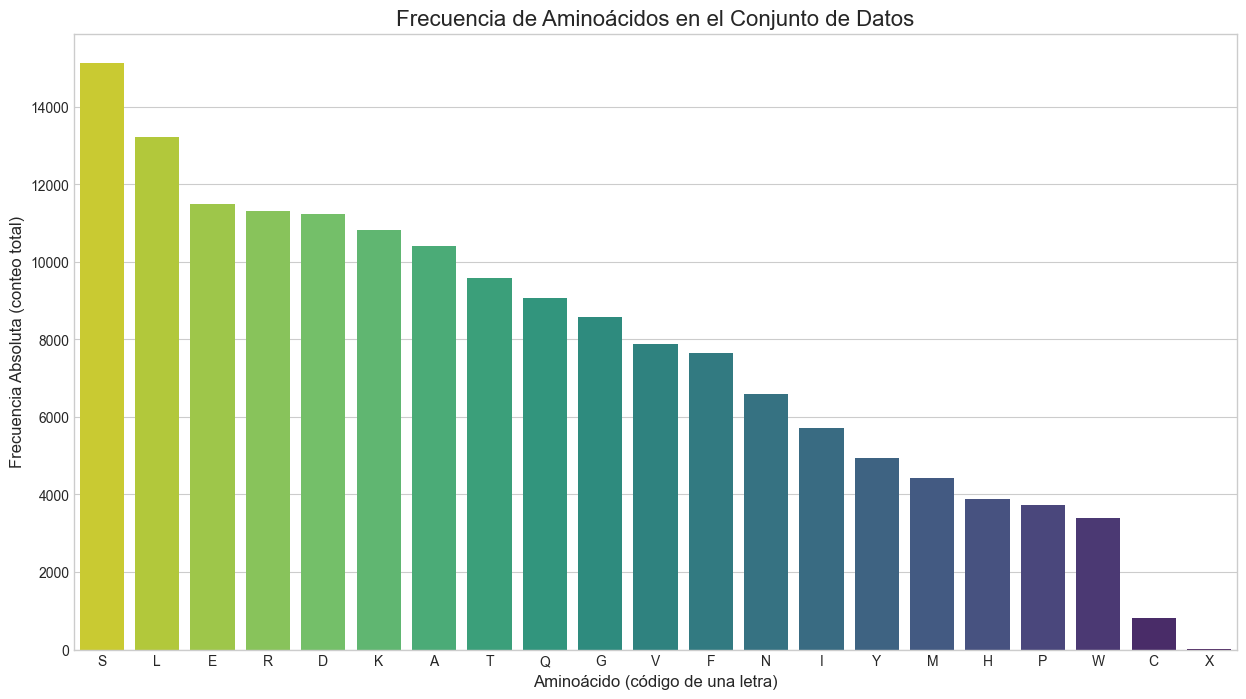

In [29]:
from collections import Counter

# --- Concatenar todas las secuencias en un solo string ---
todas_las_secuencias = "".join(df_peptidos_unicos['Secuencia'])

# --- Contar la frecuencia de cada aminoácido ---
frecuencia_aa = Counter(todas_las_secuencias)
df_frecuencia = pd.DataFrame.from_dict(frecuencia_aa, orient='index', columns=['Frecuencia'])
df_frecuencia = df_frecuencia.sort_values('Frecuencia', ascending=False)

# --- Visualizar las frecuencias con un gráfico de barras ---
plt.figure(figsize=(15, 8))
sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)

plt.title('Frecuencia de Aminoácidos en el Conjunto de Datos', fontsize=16)
plt.xlabel('Aminoácido (código de una letra)', fontsize=12)
plt.ylabel('Frecuencia Absoluta (conteo total)', fontsize=12)
plt.show()

### Catálogo de aminoácidos

| Símbolo | Aminoácido                                      |
|---------|-------------------------------------------------|
| A       | Alanine                                         |
| B       | Aspartic acid (D) or Asparagine (N)            |
| C       | Cysteine                                        |
| D       | Aspartic acid                                   |
| E       | Glutamic acid                                   |
| F       | Phenylalanine                                   |
| G       | Glycine                                         |
| H       | Histidine                                       |
| I       | Isoleucine                                      |
| J       | Leucine (L) or Isoleucine (I)                  |
| K       | Lysine                                          |
| L       | Leucine                                         |
| M       | Methionine / Start codon                        |
| N       | Asparagine                                      |
| O       | Pyrrolysine (rare)                              |
| P       | Proline                                         |
| Q       | Glutamine                                       |
| R       | Arginine                                        |
| S       | Serine                                          |
| T       | Threonine                                       |
| U       | Selenocysteine (rare)                           |
| V       | Valine                                          |
| W       | Tryptophan                                      |
| Y       | Tyrosine                                        |
| Z       | Glutamic acid (E) or Glutamine (Q)             |
| X       | Any                                             |
| *       | Translation stop                                |
| -       | Gap of indeterminate length                     |


## 3 Cálculo de propiedades físico-químicas

Algunas caracteristicas de los pepetidos pueden calcularse a partir de las secuencias de aminoacidos por lo que es posible usarlas para hacer el analisis exploratorio

In [30]:
def property_calculation(sequence: str) -> dict:
    """
    Calcula propiedades físico-químicas de una secuencia de aminoácidos.
    Devuelve None si la secuencia contiene caracteres no estándar (ej. 'X').
    """
    # Lista de aminoácidos estándar que ProtParam puede manejar
    aminoacidos_estandar = "ACDEFGHIKLMNPQRSTVWY"
    
    # Verificamos si hay caracteres no estándar en la secuencia
    if any(aa not in aminoacidos_estandar for aa in sequence):
        return {
            'peso_molecular': None,
            'punto_isoelectrico': None,
            'hidrofobicidad_gravy': None
        }
    
    try:
        analisis = ProteinAnalysis(sequence)
        return {
            'peso_molecular': analisis.molecular_weight(),
            'punto_isoelectrico': analisis.isoelectric_point(),
            'hidrofobicidad_gravy': analisis.gravy()
        }
    except Exception as e:
        print(f"No se pudo analizar la secuencia: {sequence[:30]}... Error: {e}")
        return {'peso_molecular': None, 'punto_isoelectrico': None, 'hidrofobicidad_gravy': None}


Iniciando el cálculo de propiedades físico-químicas...

 Propiedades calculadas y añadidas al DataFrame.
Primeras 5 filas del nuevo DataFrame:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...   
3  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...   
4  MKSIYFVAGLFVML

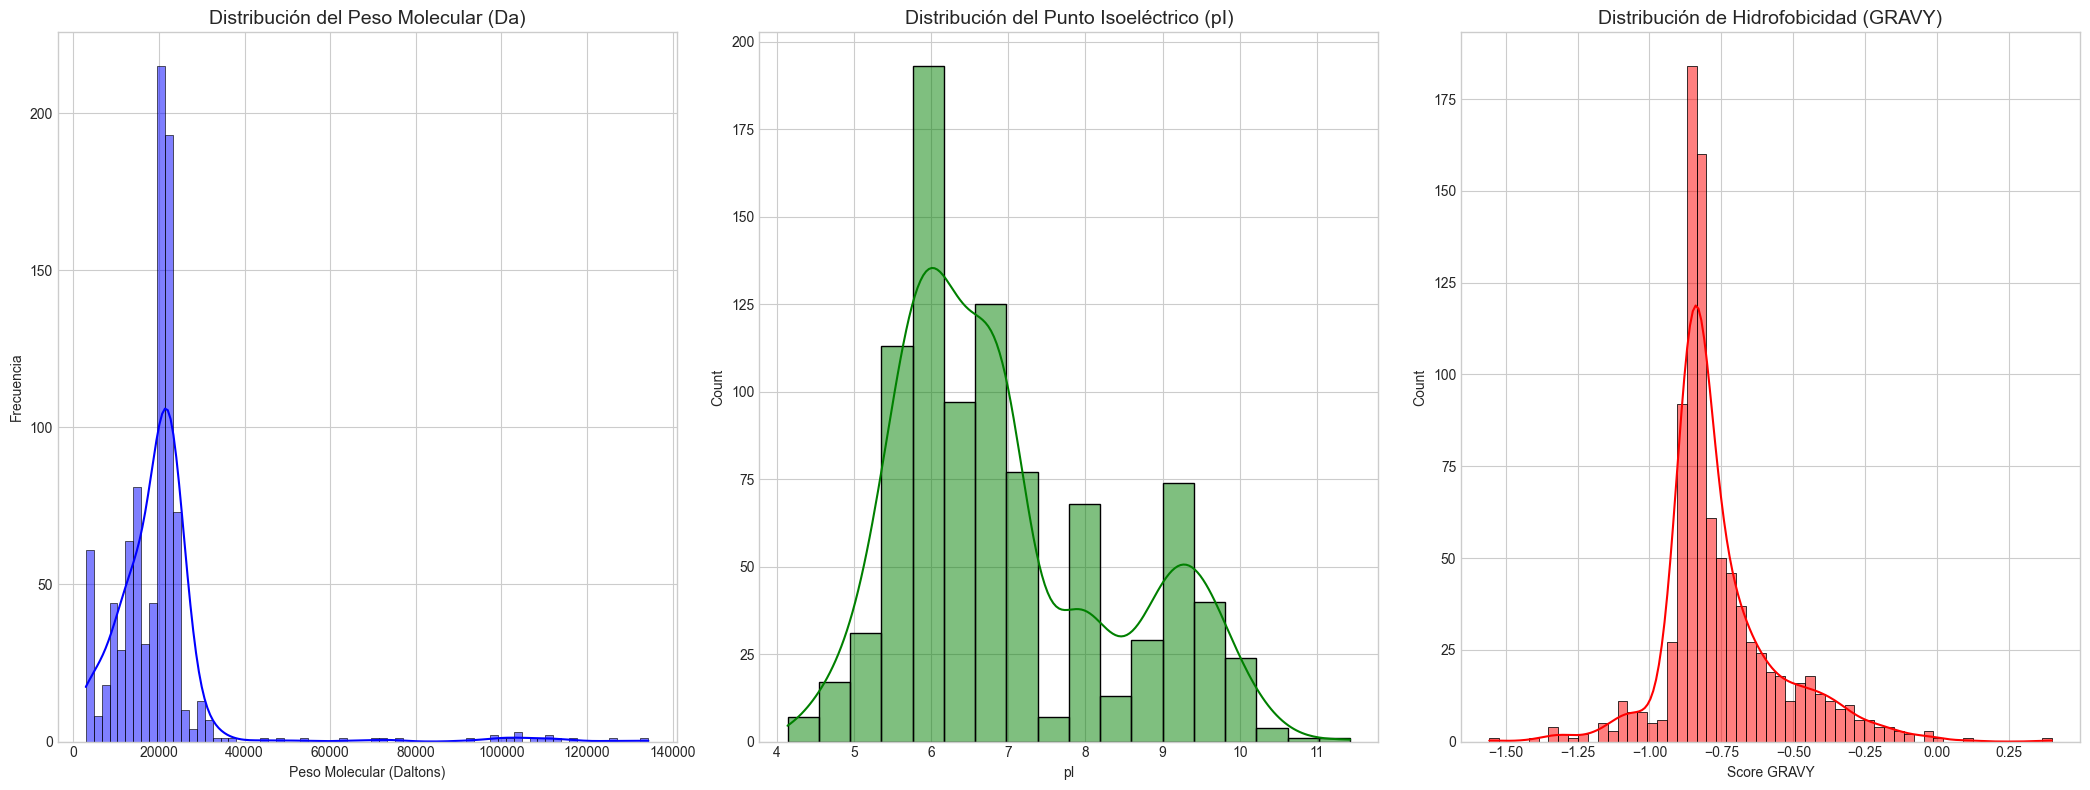


Resumen estadístico de las propiedades calculadas:
       peso_molecular  punto_isoelectrico  hidrofobicidad_gravy
count      921.000000          921.000000            921.000000
mean     19984.801100            6.944126             -0.755686
std      13963.694729            1.407308              0.202163
min       2877.160000            4.138413             -1.556944
25%      14051.446200            5.858190             -0.860199
50%      20872.961100            6.576749             -0.818889
75%      23174.664600            7.848268             -0.690449
max     134336.872000           11.429680              0.398714


In [31]:
print("Iniciando el cálculo de propiedades físico-químicas...")

propiedades_df = df_peptidos_unicos['Secuencia'].apply(lambda seq: pd.Series(property_calculation(seq)))


df_analisis = pd.concat([df_peptidos_unicos, propiedades_df], axis=1)

print("\n Propiedades calculadas y añadidas al DataFrame.")
print("Primeras 5 filas del nuevo DataFrame:")
print(df_analisis.head())


# distribución de nuevas propiedades
print("\n Generando visualizaciones de las nuevas propiedades...")

# estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(21, 8))

# Histograma del Peso Molecular
sns.histplot(df_analisis['peso_molecular'].dropna(), kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución del Peso Molecular (Da)', fontsize=14)
axes[0].set_xlabel('Peso Molecular (Daltons)')
axes[0].set_ylabel('Frecuencia')

# Histograma del Punto Isoeléctrico (pI)
sns.histplot(df_analisis['punto_isoelectrico'].dropna(), kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución del Punto Isoeléctrico (pI)', fontsize=14)
axes[1].set_xlabel('pI')

# Histograma del Score GRAVY (Hidrofobicidad)
sns.histplot(df_analisis['hidrofobicidad_gravy'].dropna(), kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribución de Hidrofobicidad (GRAVY)', fontsize=14)
axes[2].set_xlabel('Score GRAVY')

plt.tight_layout()
plt.show()

# Resumen estadístico de las nuevas columnas
print("\nResumen estadístico de las propiedades calculadas:")
print(df_analisis[['peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']].describe())


In [32]:
df_analisis.describe()


,Longitud,peso_molecular,punto_isoelectrico,hidrofobicidad_gravy
count,922.000000,921.000000,921.000000,921.000000
mean,173.290672,19984.801100,6.944126,-0.755686
std,122.502162,13963.694729,1.407308,0.202163
min,26.000000,2877.160000,4.138413,-1.556944
25%,122.000000,14051.446200,5.858190,-0.860199
50%,179.000000,20872.961100,6.576749,-0.818889
75%,201.000000,23174.664600,7.848268,-0.690449
max,1183.000000,134336.872000,11.429680,0.398714


In [33]:
df_analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    922 non-null    object 
 1   Descripcion           922 non-null    object 
 2   Secuencia             922 non-null    object 
 3   Archivo_origen        922 non-null    object 
 4   Longitud              922 non-null    int64  
 5   peso_molecular        921 non-null    float64
 6   punto_isoelectrico    921 non-null    float64
 7   hidrofobicidad_gravy  921 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 57.8+ KB


## Mapa de calor con correlacion de las variables numéricas

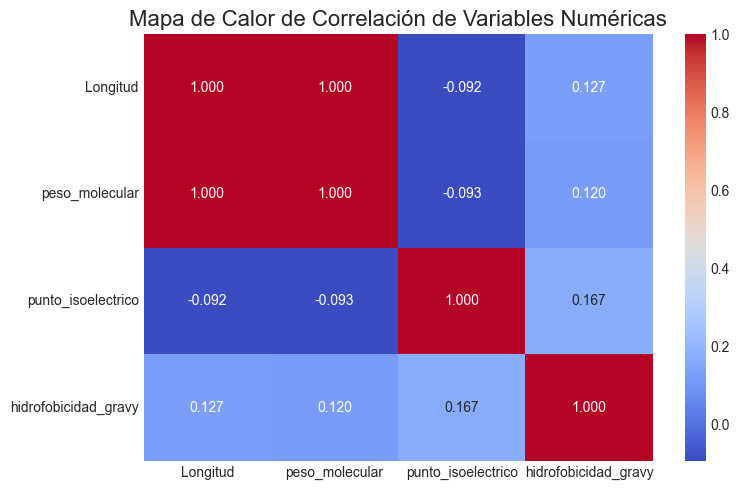

In [17]:

# solo las columnas numéricas para la correlación
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']
df_numerico = df_analisis[columnas_numericas]

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Generar el mapa de calor
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_correlacion, 
            annot=True,      
            cmap='coolwarm',
            fmt=".3f")      

# título y gráfico
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

El mapa de calor muestra las correlaciones entre las variables numéricas del DataFrame. consistentemente con lo esperado, la longitud de la secuencia y el peso molecular están fuertemente correlacionados (0.96), ya que a mayor número de aminoácidos, mayor será el peso molecular del péptido.
lo que indica que el calculo de las propiedades es correcto y consistente con la bioquímica de los péptidos.

## Detección de anomalias en las secuencias de entrada

Un indicador importante de errores en las secuencias de aminoacidos es el numero de aminoacidos incosistente con los compuestos similares del conjunto de datos.
El boxplot de las propiedades identificadas nos permite detectar secuencias anomalas que es posible eliminar para mantener la consistencia en pasos posterioes

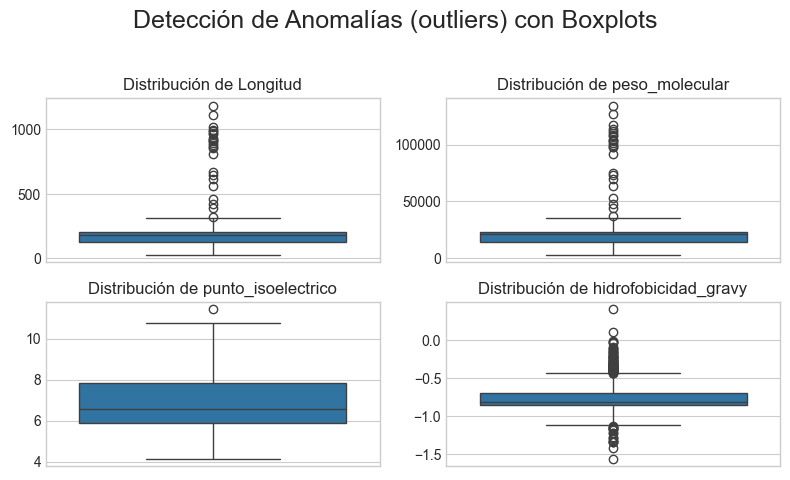

In [39]:
# Columnas numéricas a visualizar
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

# Aplanar el array de axes para iterar
axes = axes.flatten()

# Iterar sobre cada columna numérica y crear un boxplot en su respectivo subplot
for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_analisis[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('')

# layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

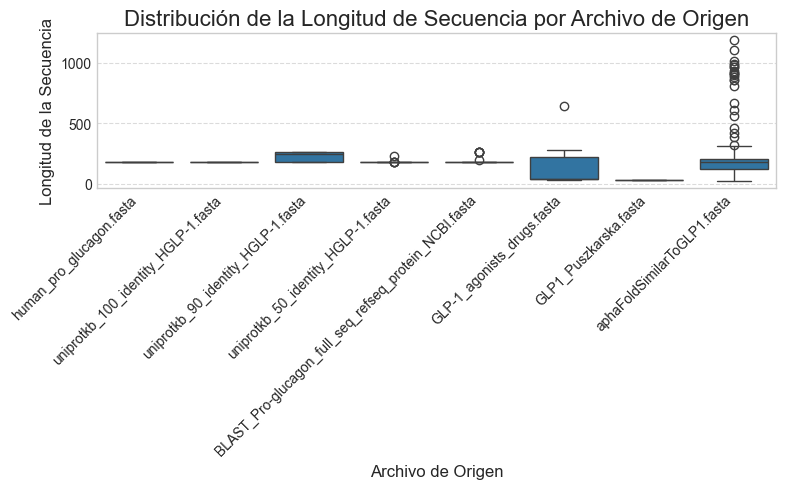

In [40]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(8, 5)) # Ajusta el tamaño según el número de categorías

# 2. Generar el boxplot
sns.boxplot(x='Archivo_origen', y='Longitud', data=df_analisis)

# 3. Mejorar la legibilidad del gráfico
plt.title('Distribución de la Longitud de Secuencia por Archivo de Origen', fontsize=16)
plt.xlabel('Archivo de Origen', fontsize=12)
plt.ylabel('Longitud de la Secuencia', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para que no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una rejilla para facilitar la lectura

# 4. Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

El archivo de Alphafold tiene varios compuestos que hacen sospechar de anomalia, por lo que se eliminan del conjunto de datos.
En este momento no es posible determinar si las otras propiedades representan anomalias o caracteristicas esperadas de los pepitdos, por lo que se conservaran para su analisis


### Eliminar outliers de las secuencias por longitud

In [45]:
out_dir = Path("../data/processed")
archivo_filtrado_fasta = out_dir/"secuencias_filtradas.fasta"

In [46]:

# Calcular el Rango Intercuartil (IQR) para la Longitud
Q1 = df_analisis['Longitud'].quantile(0.25)
Q3 = df_analisis['Longitud'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior para outliers: {limite_inferior}")
print(f"Límite superior para outliers: {limite_superior}\n")

# Filtrar el DataFrame y crear uno nuevo sin los outliers
df_filtrado = df_analisis[
    (df_analisis['Longitud'] >= limite_inferior) & 
    (df_analisis['Longitud'] <= limite_superior)
]

# Verificar el resultado
print(f"Tamaño del DataFrame original: {df_analisis.shape[0]} filas")
print(f"Tamaño del DataFrame nuevo (sin outliers): {df_filtrado.shape[0]} filas")
print(f"Se eliminaron {df_analisis.shape[0] - df_filtrado.shape[0]} filas.")


Límite inferior para outliers: 3.5
Límite superior para outliers: 319.5

Tamaño del DataFrame original: 922 filas
Tamaño del DataFrame nuevo (sin outliers): 898 filas
Se eliminaron 24 filas.


In [47]:
# Definir el nombre del archivo de salida
nombre_archivo_fasta = archivo_filtrado_fasta

# Abrir el archivo en modo de escritura ('w')
with open(nombre_archivo_fasta, 'w') as archivo_fasta:
    # Iterar sobre cada fila del DataFrame
    for index, row in df_filtrado.iterrows():
        # Obtener el identificador y la secuencia de la fila actual
        identificador = row['ID']
        descripcion = row['Descripcion']
        secuencia = row['Secuencia']
        
        # Crear la línea de cabecera del formato FASTA
        # Combina el ID y la Descripción
        cabecera_fasta = f">{identificador} {descripcion}"
        
        # Escribir la cabecera y la secuencia en el archivo
        archivo_fasta.write(cabecera_fasta + "\n")
        archivo_fasta.write(secuencia + "\n")

print(f"Se ha guardado el archivo '{nombre_archivo_fasta}' con {len(df_filtrado)} secuencias.")
num_registros = validate_fasta_file(nombre_archivo_fasta)
# Usamos archivo_path.name para obtener solo el nombre del archivo para el reporte
if num_registros is not None:
   print(F"Archivo {nombre_archivo_fasta} FASTA válido.")

Se ha guardado el archivo '..\data\processed\secuencias_filtradas.fasta' con 898 secuencias.
Procesando archivo: ..\data\processed\secuencias_filtradas.fasta...
 ¡Formato correcto! Se encontraron 898 registros.
Archivo ..\data\processed\secuencias_filtradas.fasta FASTA válido.


### Resultado del análisis tras eliminar las secuencias inconsistentes

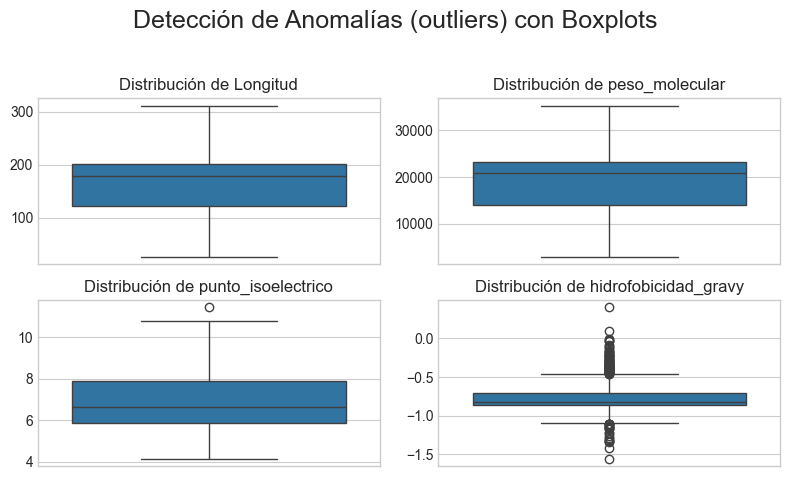

In [48]:
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_filtrado[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

## Analísis de alineación de las secuencias de aminoácidos

El análisis de alineamiento de secuencias de aminoácidos facilita la búsqueda y clasificación de familias de péptidos, permite encontrar relaciones funcionales y evolutivas a partir de la simple secuencia de "letras" que componen un péptido

### Alienación de las secuencias con ClustalOmega

Clustal Omega es un programa informático ampliamente utilizado en bioinformática para realizar alineamientos de secuencias múltiples (MSA, por sus siglas en inglés). Fue desarrollado por la European Bioinformatics Institute (EBI) y es conocido por su capacidad para manejar grandes conjuntos de datos de secuencias de manera eficiente y precisa.   
El alineamiento de secuencias múltiples permite comparar y analizar varias secuencias simultáneamente. Utiliza algoritmos avanzados para alinear estas secuencias, identificando regiones conservadas y variaciones entre ellas. Esto es crucial para entender relaciones evolutivas, funciones biológicas y estructuras moleculares.

In [49]:
import os
import shutil

# agregar la ruta de Clustal Omega
ruta_clustal = r"D:\source\Proyecto Integrador\Libs\clustal-omega-1.2.2-win64"

# Agregar la ruta al PATH de la sesión actual
os.environ["PATH"] = ruta_clustal + os.pathsep + os.environ["PATH"]


# Verificar si clustalo.exe está en el PATH
clustal_path = shutil.which("clustalo.exe")
print("Ruta encontrada:", clustal_path if clustal_path else "No se encontró clustalo.exe")


Ruta encontrada: D:\source\Proyecto Integrador\Libs\clustal-omega-1.2.2-win64\clustalo.exe


In [50]:
#Ejecutar Clustal Omega para alinear las secuencias de aminoácidos
#  
from Bio import SeqIO
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import subprocess 
import os

# Preparar los archivos de entrada y salida
archivo_entrada = archivo_filtrado_fasta
archivo_salida_alineamiento = out_dir/"alineamiento.clustal"


# Construir y ejecutar el comando con el módulo subprocess
comando_clustalo = "clustalo.exe" #en Windows

try:
    print("\nEjecutando Clustal Omega... (Este proceso puede tardar muuucho :(  )")
    
    comando = [
        comando_clustalo,
        "-i", archivo_entrada,
        "-o", archivo_salida_alineamiento,
        "--auto",
        "-v",
        "--force",
        "--outfmt=clu",
        "--threads=4" # Ajusta el número de hilos según el CPU
    ]
    
    resultado = subprocess.run(comando, check=True, capture_output=True, text=True)
    
    print("\nAlineamiento completado!")
    print(f"El resultado guardado en el archivo: '{archivo_salida_alineamiento}'")

except FileNotFoundError:
    print(f"ERROR: No se encontró el ejecutable '{comando_clustalo}'.")
except subprocess.CalledProcessError as e:
    print(f"ERROR: Clustal Omega falló.")
    print("Mensaje de error:\n", e.stderr)
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")





Ejecutando Clustal Omega... (Este proceso puede tardar muuucho :(  )

Alineamiento completado!
El resultado guardado en el archivo: '..\data\processed\alineamiento.clustal'


In [51]:
from Bio import AlignIO

alineamiento = None

print(f"Cargar el archivo de alineamiento: '{archivo_salida_alineamiento}'")

try:
    # AlignIO para leer el archivo de alineamiento
    alineamiento = AlignIO.read(archivo_salida_alineamiento, "clustal")
    
    print("\nArchivo de alineamiento cargado exitosamente en la variable 'alineamiento'.")
    print("\nRESUMEN DEL ALINEAMIENTO ---")
    print(f"Número de secuencias alineadas: {len(alineamiento)}")
    print(f"Longitud del alineamiento (columnas): {alineamiento.get_alignment_length()}")

except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{archivo_salida_alineamiento}'.")
    print("Asegúrate de haber ejecutado la Celda 1 exitosamente primero.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Cargar el archivo de alineamiento: '..\data\processed\alineamiento.clustal'

Archivo de alineamiento cargado exitosamente en la variable 'alineamiento'.

RESUMEN DEL ALINEAMIENTO ---
Número de secuencias alineadas: 898
Longitud del alineamiento (columnas): 804


## Mapa de calor de alineación de las secuencias

Con las secuencias alineadas, podemos identificar regiones conservadas y variables, lo que es importante para entender las relaciones evolutivas y funcionales entre los péptidos.
El mapa de calor de la matriz de distancia nos permite visualizar las similitudes y diferencias entre las secuencias alineadas, facilitando la identificación de patrones evolutivos y funcionales.
En este caso, las secuencias en amarillo no son relevantes para el análisis y se pueden eliminar, en la ingeniería de características posterior.

Calculando la matriz de frecuencia de aminoácidos por posición...
Matriz de frecuencias calculada.
Primeras 5 columnas de la matriz:
     1         2    3         4    5
A  0.0  0.111359  0.0  0.000000  0.0
B  0.0  0.000000  0.0  0.000000  0.0
C  0.0  0.111359  0.0  0.000000  0.0
D  0.0  0.000000  0.0  0.000000  0.0
E  0.0  0.000000  0.0  0.111359  0.0

Generando el heatmap de distribución de aminoácidos...


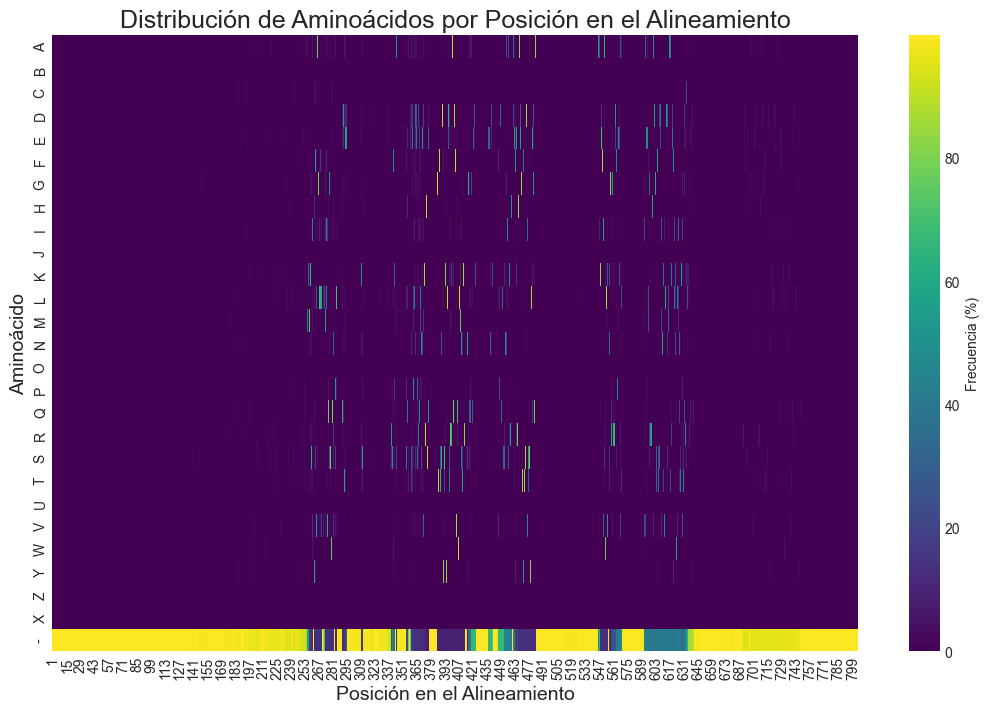

In [52]:
from collections import Counter


if alineamiento:
    print("Calculando la matriz de frecuencia de aminoácidos por posición...")

    # lista de aminoácidos estándar y la longitud del alineamiento
    aminoacidos = "ABCDEFGHIJKLMNOPQRSTUVWYZX-" # 20 AAs estándar + el gap '-'
    longitud_alineamiento = alineamiento.get_alignment_length()
    
    # Creamos un DataFrame vacío para almacenar las frecuencias
    #    Filas Aminoácidos 
    #    Columnas Posiciones del alineamiento
    df_frecuencias = pd.DataFrame(
        np.zeros((len(aminoacidos), longitud_alineamiento)), 
        index=list(aminoacidos), 
        columns=range(1, longitud_alineamiento + 1)
    )

    # llenado del DataFrame con los conteos de cada columna del alineamiento
    num_secuencias = len(alineamiento)
    for i in range(longitud_alineamiento):
        # Extraemos todos los caracteres de la columna 'i'
        columna = alineamiento[:, i]
        # Contamos cuántas veces aparece cada aminoácido en esa columna
        conteo_columna = Counter(columna)
        
        for aa, count in conteo_columna.items():
            if aa in df_frecuencias.index:
                # Calculamos la frecuencia como un porcentaje
                df_frecuencias.loc[aa, i + 1] = (count / num_secuencias) * 100

    print("Matriz de frecuencias calculada.")
    print("Primeras 5 columnas de la matriz:")
    print(df_frecuencias.iloc[:, :5].head())

    # Visualizar la matriz de frecuencias con un Heatmap
    print("\nGenerando el heatmap de distribución de aminoácidos...")
    
    plt.figure(figsize=(13, 8)) 

    sns.heatmap(df_frecuencias, cmap="viridis", cbar_kws={'label': 'Frecuencia (%)'})

    plt.title('Distribución de Aminoácidos por Posición en el Alineamiento', fontsize=18)
    plt.xlabel('Posición en el Alineamiento', fontsize=14)
    plt.ylabel('Aminoácido', fontsize=14)
    plt.show()

else:
    print("La variable 'alineamiento' no contiene datos. ejecutar la celda anterior exitosamente.")

### Resultado del analisis de alineamiento
El mapa de calor muestra la frecuencia relativa de cada aminoácido en cada posición del alineamiento múltiple. la ultima fila indica los gaps y posiciones sin aminoácidos. Las regiones en el interior de las secuencias indica que segmentos pudieran tener relación especifica para cada organismo.

### Analisis logo de la variabilidad de las secuencias
Este análisis permite ver graficamente le grado de variabilidad de las secuencias alineadas y detectar posiciones conservadas y variables en el alineamiento.

Generando el Sequence Logo...


c:\Users\Dev\.conda\envs\drug_discovery\lib\site-packages\logomaker\src\error_handling.py:58: UserWarning:  Warning: Character 'X' is not in color_dict. Using black.
  warnings.warn(str(Error))


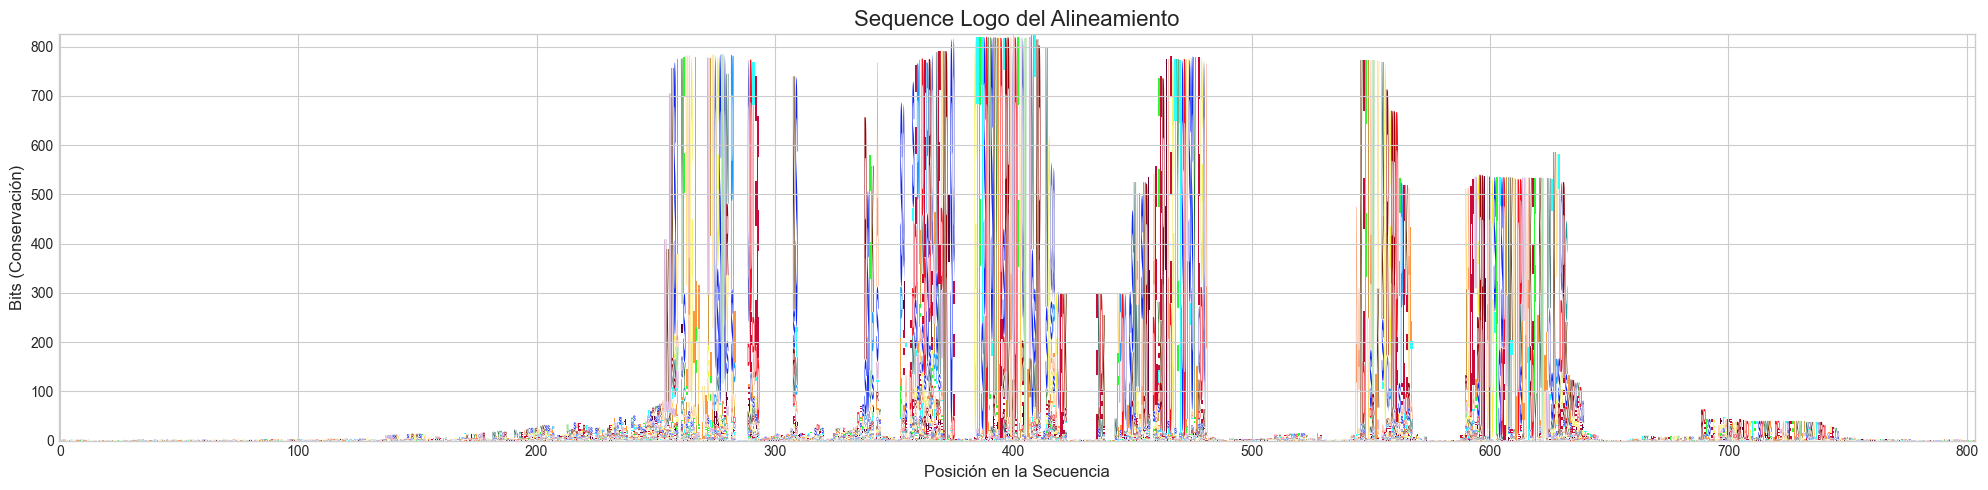

In [54]:
import logomaker
nombre_archivo_clustal =  archivo_salida_alineamiento

try:
    alineamiento = AlignIO.read(nombre_archivo_clustal, 'clustal')
    counts_df = logomaker.alignment_to_matrix(
        sequences=[str(rec.seq) for rec in alineamiento],
        to_type='counts'
    )
    if '-' in counts_df.columns:
        counts_df.drop('-', axis=1, inplace=True)
    
    datos_cargados = True
except Exception as e:
    print(f"Error al cargar o procesar el archivo: {e}")
    datos_cargados = False


def generar_sequence_logo(df_conteos):
    """
    Genera y muestra un Sequence Logo a partir de un DataFrame de conteos.
    """
    print("Generando el Sequence Logo...")
    
    # Crear la figura y los ejes para tener control total
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))

    # Crear el objeto Logo en los ejes especificados
    logo = logomaker.Logo(df_conteos,
                          ax=ax,
                          font_name='Arial',
                          color_scheme='skylign_protein')

    # Configurar títulos y etiquetas en los ejes
    ax.set_title('Sequence Logo del Alineamiento', fontsize=16)
    ax.set_xlabel('Posición en la Secuencia', fontsize=12)
    ax.set_ylabel('Bits (Conservación)', fontsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
    
    # 5. Cerrar la figura para evitar que se vuelva a mostrar
    plt.close(fig)

# LLAMAR A LA FUNCIÓN PARA CREAR EL GRÁFICO ---
# Solo se ejecuta si los datos se cargaron correctamente
if datos_cargados:
    generar_sequence_logo(counts_df)

# Conclusiones

## Referencias



[1] World Health Organization. (2021). *Diabetes*. https://www.who.int/news-room/fact-sheets/detail/diabetes  

[2] Secretaría de Salud México. (2022). *Epidemiología de la Diabetes Mellitus en México*. Gobierno de México.  

[3] Drucker, D. J. (2018). Mechanisms of Action and Therapeutic Application of Glucagon-like Peptide-1. *Cell Metabolism*, 27(4), 740–756. https://doi.org/10.1016/j.cmet.2018.03.001  

[4] Wishart, D. S., et al. (2018). DrugBank 5.0: A major update to the DrugBank database for 2018. *Nucleic Acids Research*, 46(D1), D1074–D1082. https://doi.org/10.1093/nar/gkx1037  

[5] Berman, H. M., et al. (2000). The Protein Data Bank. *Nucleic Acids Research*, 28(1), 235–242. https://doi.org/10.1093/nar/28.1.235  


- compositional score matrix adjustment
Stephen F. Altschul, John C. Wootton, E. Michael Gertz, Richa Agarwala, Aleksandr Morgulis, Alejandro A. Schäffer, and Yi-Kuo Yu (2005) "Protein database searches using compositionally adjusted substitution matrices", FEBS J. 272:5101-5109.

- Title:NCBI Protein Reference Sequences
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:414629663


Title:All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS projects
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:964008091